# Classificador Naive Bayes

Naive Bayes é uma técnica usada para construir classificadores usando o teorema de Bayes. O teorema de Bayes descreve a probabilidade de um evento ocorrer com base em diferentes condições relacionadas a esses evento. Contruímos um classificador Naive Bayes, atribuindo rótulos de classes a instâncias de problemas. Essas instãn cias do problema são representadas como vetores de valores de recursos. A suposição aqui é que o valor de qualquer recurso dado é independente do valor de qualquer outro recurso. Isso é chamado de pressuposto da independencia, que é aparate ingênua de um classificador Naive Bayes.

Dada a variável de classe, podemos ver apenas como um determinado recurso afeta, independentemente de seu efeito sobre outros resursos. Por exemplo, um animal pode ser considerado uma chita se for manchado, tiver quatro patas, tiver cauda e correr a cerca de 70 km/h . Um classificador Naive Bayes considera que cada uma dessas caracteristicas contribui de forma independente para o resultado. O resultado refere-se à probabilidade de que este animal seja um chita. Não nos preocupamos com as correlações que podem existir entre padrões de pele, número de pernas, presença de cauda e velocidade de movimento.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from utilities import visualize_classifier

/home/jailson/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# lendo dados do arquivo data_multivar_nb
input_file = 'data_multivar_nb.txt'

#carregando dados
data = np.loadtxt(input_file,delimiter=',')
X,y = data[:,:-1],data[:,-1]

Criando uma instâcia Naive Bayes. Usando o classificador Gaussian Naive Bayes. Este tipo de classificador, assume que os valores associados em cada clase segue uma distribuição gaussiana:

In [3]:
# criando Naive Bayes CLassificador
classifier = GaussianNB()

Treinando o classificador usando os dados de treinamento:

In [4]:
# treinando o classificador 
classifier.fit(X,y)

GaussianNB(priors=None)

Executando o classificador nos dados de treinamento e prevendo a saída:

In [5]:
#prevendo os valores pra treinamento de dados
y_pred = classifier.predict(X)

Calculando a precisão do classificador comparando os valores previsto com os rótulos verdadeiros .

Visualização do desempenho.

In [6]:
# compute accuracy
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]

print("Accuracy of Naive Bayes classifier =",round(accuracy,2), "%")

Accuracy of Naive Bayes classifier = 99.75 %


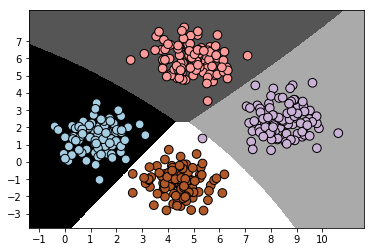

In [7]:
# visualização da performance do classificador
visualize_classifier(classifier,X,y)

O método anterior para calcular a precisão do classificador não é muito robusto. Precisamos realizar a validação cruzada, para que não utilizemos os mesmos dados de treinamento quando os testamos.

Dividimos os dados em subconjunto de treinamento e teste. Conforme especificado pelo test_size parâmetro na linha abaixo,alocaremos 80% para treinamento e os 20% restantes para teste. Então, vamos treinar um classificador Naive Bayes nesses dados:

In [8]:
# split dos dados em treinamento e teste
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.2,random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train,y_train)
y_test_pred = classifier_new.predict(X_test)

In [9]:
#calculando a precisão do classificador 
accuracy = 100.0 * (y_test == y_test_pred).sum()/X_test.shape[0]
print("accuracy of the new classifier =", round(accuracy,2), "%")

accuracy of the new classifier = 100.0 %


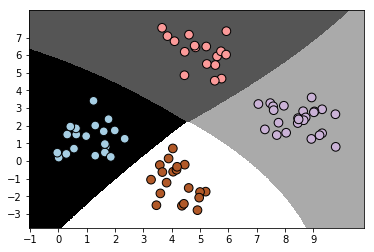

In [10]:
# visualização da performance 
visualize_classifier(classifier_new,X_test,y_test)

usando funções incoporadas para calcular os valores de exatidão,precisão e recuperação com base na validação cruzada tripla:

In [12]:
num_folds = 3
accuracy_values = cross_validation.cross_val_score(classifier,X,y,scoring='accuracy',cv=num_folds)
print("Accuracy: "+str(round(100*accuracy_values.mean(),2)) + "%")

precision_values = cross_validation.cross_val_score(classifier,X,y,scoring='precision_weighted',cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(),2)) + "%")

recall_values = cross_validation.cross_val_score(classifier,X, y, scoring='recall_weighted', cv=num_folds) 
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%") 

f1_values = cross_validation.cross_val_score(classifier,
                                            X,y,scoring='f1_weighted',cv=num_folds)
print("F1 "+str(round(100*f1_values.mean(),2)) +"%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1 99.75%
